In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_csv = pd.read_csv('./data.csv', usecols=[1])

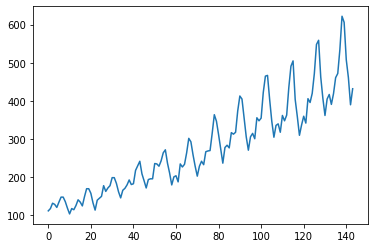

In [3]:
plt.plot(data_csv)

In [16]:
data_csv = data_csv.dropna()
dataset = data_csv.values
dataset = dataset.astype('float32')
max_value = np.max(dataset)
min_value = np.min(dataset)
scalar = max_value - min_value
dataset = list(map(lambda x: x / scalar, dataset))

In [17]:
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        print('Iter', i)
        print('a',a)
        dataX.append(a)
        print('Dataset[i + look_back]', dataset[i + look_back])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
    

In [18]:
data_X, data_Y = create_dataset(dataset)

#dataX 是前两个数， dataY是后一个数， 步长为1往下迭代

Iter 0
a [array([0.21621622], dtype=float32), array([0.22779922], dtype=float32)]
Dataset[i + look_back] [0.25482625]
Iter 1
a [array([0.22779922], dtype=float32), array([0.25482625], dtype=float32)]
Dataset[i + look_back] [0.24903475]
Iter 2
a [array([0.25482625], dtype=float32), array([0.24903475], dtype=float32)]
Dataset[i + look_back] [0.23359074]
Iter 3
a [array([0.24903475], dtype=float32), array([0.23359074], dtype=float32)]
Dataset[i + look_back] [0.26061776]
Iter 4
a [array([0.23359074], dtype=float32), array([0.26061776], dtype=float32)]
Dataset[i + look_back] [0.2857143]
Iter 5
a [array([0.26061776], dtype=float32), array([0.2857143], dtype=float32)]
Dataset[i + look_back] [0.2857143]
Iter 6
a [array([0.2857143], dtype=float32), array([0.2857143], dtype=float32)]
Dataset[i + look_back] [0.26254827]
Iter 7
a [array([0.2857143], dtype=float32), array([0.26254827], dtype=float32)]
Dataset[i + look_back] [0.22972973]
Iter 8
a [array([0.26254827], dtype=float32), array([0.2297297

In [20]:
train_size = int(len(data_X) * 0.7)   # 0.7 做训练集
test_size = len(data_X - train_size)
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

In [23]:
import torch

# RNN（seq, batch, feature）这里只有一个序列，所以batch=1， feature 依据前2判断后1

train_X = train_X.reshape(-1, 1, 2)
train_Y = train_Y.reshape(-1, 1, 1)
test_X = test_X.reshape(-1, 1, 2)

train_x = torch.from_numpy(train_X)
train_y = torch.from_numpy(train_Y)
test_x = torch.from_numpy(test_X)

In [24]:
from torch import nn
from torch.autograd import Variable

In [25]:
class lstm_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
        super(lstm_net, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.reg = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x, _ = self.lstm(x)
        s, b, h = x.shape
        x = x.view(s*b, h)
        x = self.reg(x)
        x = x.view(s, b, -1)
        return x

In [30]:
net = lstm_net(2, 10)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

In [31]:
net

lstm_net(
  (lstm): LSTM(2, 10, num_layers=2)
  (reg): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
for e in range(1000):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
    
    out = net(var_x)
    loss = criterion(out, var_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e+1) %100 == 0:
        print('epoch:', e+1, ' Loss:', loss)

epoch: 100  Loss: tensor(0.0034, grad_fn=<MseLossBackward>)
epoch: 200  Loss: tensor(0.0031, grad_fn=<MseLossBackward>)
epoch: 300  Loss: tensor(0.0017, grad_fn=<MseLossBackward>)
epoch: 400  Loss: tensor(0.0012, grad_fn=<MseLossBackward>)
epoch: 500  Loss: tensor(0.0010, grad_fn=<MseLossBackward>)
epoch: 600  Loss: tensor(0.0006, grad_fn=<MseLossBackward>)
epoch: 700  Loss: tensor(0.0004, grad_fn=<MseLossBackward>)
epoch: 800  Loss: tensor(0.0003, grad_fn=<MseLossBackward>)
epoch: 900  Loss: tensor(0.0003, grad_fn=<MseLossBackward>)
epoch: 1000  Loss: tensor(0.0003, grad_fn=<MseLossBackward>)


In [35]:
net_test = net.eval()

In [39]:
data_X.shape

(142, 2, 1)

In [40]:
data_X = data_X.reshape(-1, 1, 2)
print(data_X.shape)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
pred_test = net_test(var_data)

(142, 1, 2)


In [41]:
print(pred_test)
pred_test = pred_test.view(-1).data.numpy()
print(pred_test)

tensor([[[0.2378]],

        [[0.2612]],

        [[0.2728]],

        [[0.2710]],

        [[0.2699]],

        [[0.2644]],

        [[0.2486]],

        [[0.2249]],

        [[0.2070]],

        [[0.2096]],

        [[0.2362]],

        [[0.2324]],

        [[0.2602]],

        [[0.2617]],

        [[0.2746]],

        [[0.2884]],

        [[0.3152]],

        [[0.3223]],

        [[0.3039]],

        [[0.2677]],

        [[0.2398]],

        [[0.2589]],

        [[0.2962]],

        [[0.2859]],

        [[0.3178]],

        [[0.3214]],

        [[0.3259]],

        [[0.3609]],

        [[0.3749]],

        [[0.3888]],

        [[0.3550]],

        [[0.3074]],

        [[0.2921]],

        [[0.3205]],

        [[0.3454]],

        [[0.3459]],

        [[0.3681]],

        [[0.3694]],

        [[0.3801]],

        [[0.4044]],

        [[0.4486]],

        [[0.4487]],

        [[0.4283]],

        [[0.3417]],

        [[0.3337]],

        [[0.3530]],

        [[0.3874]],

        [[0.3

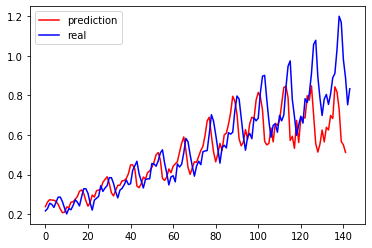

In [43]:
plt.plot(pred_test, 'r', label='prediction')
plt.plot(dataset, 'b', label='real')
plt.legend(loc='best')